# ETL (Geting data from public API)  + visualization using KDB Q+

### Call get from public API, it becomes into a dictionary easy to parse, all in one line.
__[See reference](https://code.kx.com/q/ref/dotq/#qhg-http-get)__

In [1]:
res_allcoins:.j.k .Q.hg "https://min-api.cryptocompare.com/data/all/coinlist";
type res_allcoins
res_allcoins

99h


Response    | "Success"
Message     | "Coin list succesfully returned!"
Data        | `42`300`365`404`433`611`808`888`1337`2015`BTCD`CRAIG`XBS`XPY`PR..
BaseImageUrl| "https://www.cryptocompare.com"
BaseLinkUrl | "https://www.cryptocompare.com"
RateLimit   | (`symbol$())!()
HasWarning  | 0b
Type        | 100f


### Parsing that dictionary and storing it into a kdb table
__[See reference](https://code.kx.com/q4m3/5_Dictionaries/#513-lookup)__

In [2]:
tab_coins:([] coin: key res_allcoins[`Data];id:`$value res_allcoins[`Data;;`Id]; name:`$value res_allcoins[`Data;;`Name];coinName:`$value res_allcoins[`Data;;`CoinName];description:`$value res_allcoins[`Data;;`Description];sortOrder:"I"$value res_allcoins[`Data;;`SortOrder];rating:`$value res_allcoins[`Data;;`Rating;`Weiss;`Rating];timeStamp:(count res_allcoins[`Data]) # .z.p);
meta tab_coins

c          | t f a
-----------| -----
coin       | s    
id         | s    
name       | s    
coinName   | s    
description| s    
sortOrder  | i    
rating     | s    
timeStamp  | p    


In [3]:
res_list: "," sv (string 10#exec coin from `sortOrder xasc select  from tab_coins);
res_list

"BTC,ETH,LTC,DASH,XMR,NXT,ETC,DOGE,ZEC,BTS"


In [4]:
res:{[coin;curr].j.k  .Q.hg "https://min-api.cryptocompare.com/data/pricemultifull?fsyms=",coin,"&tsyms=",curr}[res_list;string`USD];
tab_coins_prices:(uj)over enlist each res[`RAW;;`USD]
save `:tab_coins_prices.csv

`:tab_coins_prices.csv


### Using embedpy and matplotlib adding a bar graph

In [5]:
FROMSYMBOL: {[col]  ?[`tab_coins_prices;();();col]} [`FROMSYMBOL]
PRICE: {[col]  ?[`tab_coins_prices;();();col]} [`PRICE]
.p.set[`FROMSYMBOL]FROMSYMBOL
.p.set[`PRICE]PRICE

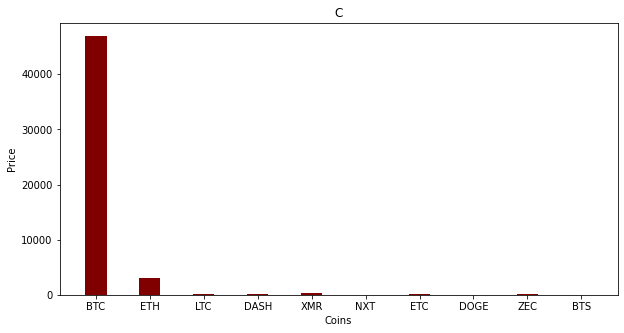

In [6]:
\l p.q
p)import matplotlib.pyplot as plt
p)fig = plt.figure(figsize = (10, 5))
p)plt.bar(FROMSYMBOL, PRICE, color ='maroon',width = 0.4)
p)plt.xlabel("Coins")
p)plt.ylabel("Price")
p)plt.title("C")
p)plt.show()